<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

- Whether the person donated blood
- What kind of classification problem do they have?


## Actual Question
Choose the **one** question that should be answered.

- Whether the person donate the blood

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_curve, precision_score, auc
import sklearn.metrics as metrics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.utils import resample

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data in pandas
csv = '../DATA/transfusion.csv'
df = pd.read_csv(csv)
# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# Perform EDA by investigating each of the points above 

In [4]:
print(f'Number of features {df.shape[1]}')

Number of features 5


In [5]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [6]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [7]:
for column in df.columns:
    print(f'{column}')
    print(f'Min: {df[column].min()}  Max:   {df[column].max()} ')
    print('Unique Values:')
    print(df[column].unique())
    print(' ')

Recency (months)
Min: 0  Max:   74 
Unique Values:
[ 2  0  1  4  5  9  3 12  6 11 10 13  8 14  7 16 15 23 21 18 22 26 35 38
 40 74 20 17 25 39 72]
 
Frequency (times)
Min: 1  Max:   50 
Unique Values:
[50 13 16 20 24  4  7 12  9 46 23  3 10  6  5 14 15 11  8  2 19 17  1 22
 18 38 43 34 44 26 41 21 33]
 
Monetary (c.c. blood)
Min: 250  Max:   12500 
Unique Values:
[12500  3250  4000  5000  6000  1000  1750  3000  2250 11500  5750   750
  2500  1500  1250  3500  3750  2750  2000   500  4750  4250   250  5500
  4500  9500 10750  8500 11000  6500 10250  5250  8250]
 
Time (months)
Min: 2  Max:   98 
Unique Values:
[98 28 35 45 77  4 14 22 58 47 15 11 48 49 16 40 34 21 26 64 57 53 69 36
  2 46 52 81 29  9 74 25 51 71 23 86 38 76 70 59 82 61 79 41 33 10 95 88
 19 37 39 78 42 27 24 63 43 75 73 50 60 17 72 62 30 31 65 89 87 93 83 32
 12 18 55  3 13 54]
 
whether he/she donated blood in March 2007
Min: 0  Max:   1 
Unique Values:
[1 0]
 


In [8]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<AxesSubplot:>

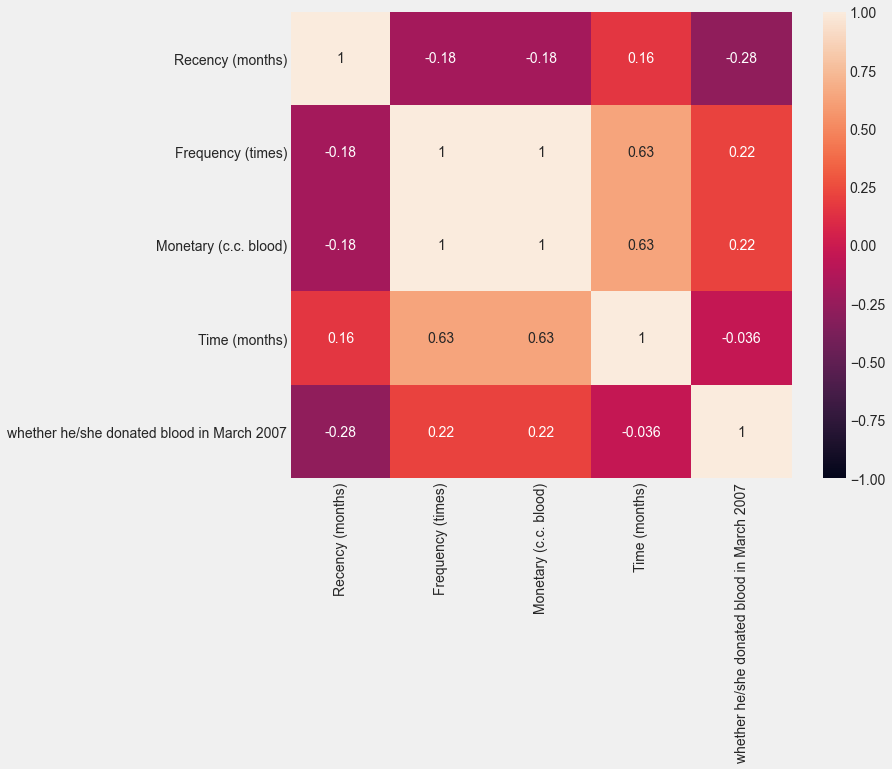

In [9]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot = True)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [10]:
# Filter/subset/clean the data according to your EDA findings

In [11]:
values = df.values

imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)

imputedData = imputer.fit_transform(values)

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_value = scaler.fit_transform(imputedData)
df_n = pd.DataFrame.from_records(scaled_value, columns = df.columns)
df_n.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0.027027,1.000000,1.000000,1.000000,1.0
1,0.000000,0.244898,0.244898,0.270833,1.0
2,0.013514,0.306122,0.306122,0.343750,1.0
3,0.027027,0.387755,0.387755,0.447917,1.0
4,0.013514,0.469388,0.469388,0.781250,0.0


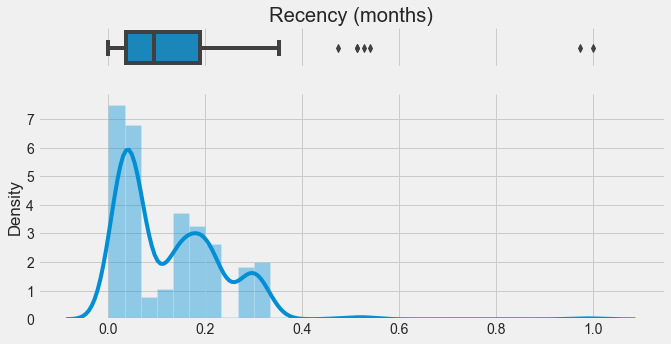

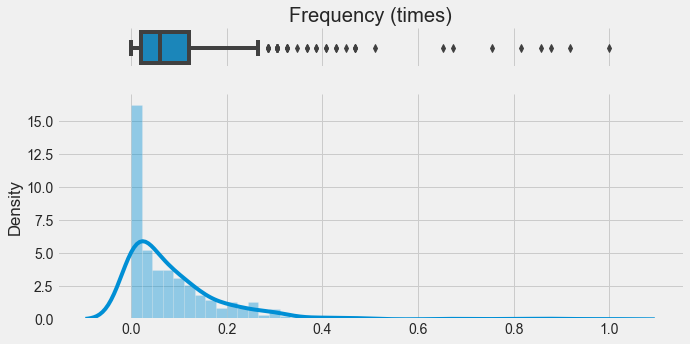

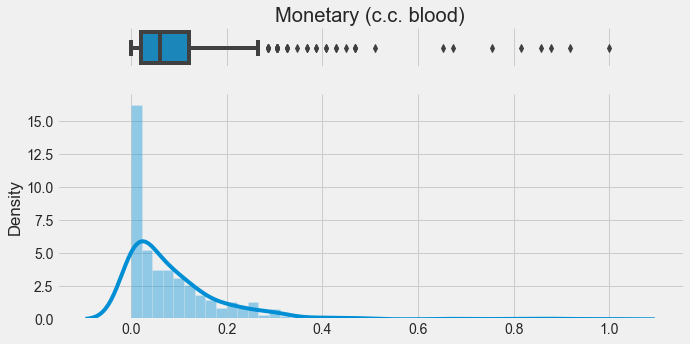

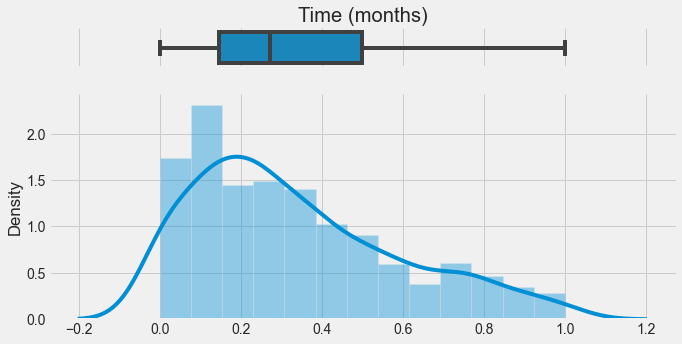

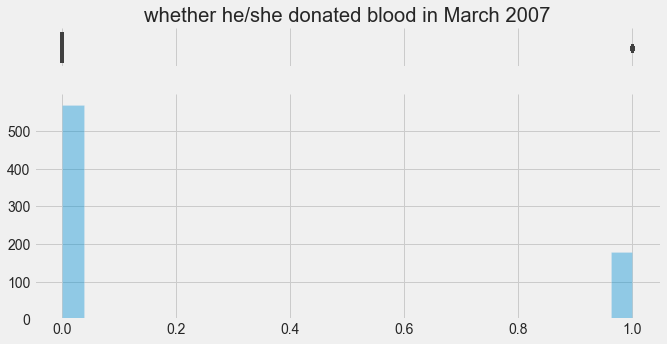

In [13]:
# Check if there is outlier
for c in df_n.columns:

    fig, ax = plt.subplots(2, 
                           figsize = (10, 5), 
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})
    
    ax_box = ax[0]
    ax_box = sns.boxplot(df_n[c], ax = ax_box)
    ax_box.set(title = c, yticks= [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    if c not in  'whether he/she donated blood in March 2007':
        ax_hist = sns.distplot(df_n[c], ax = ax_hist)
    else:
        ax_hist = sns.distplot(df_n[c], ax = ax_hist, kde = False)
    
    ax_hist.set(xlabel = '')
    sns.despine(ax = ax_hist)
    
plt.show()

In [14]:
# Defining Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier()

target = 'whether he/she donated blood in March 2007'
X = df_n.drop(target, axis=1)
y = df_n[target]

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [15]:
print('- What are the input variables (features)?')
print(f'  - %s' % ', '.join(X.columns))
print('- Is there an output variable (label)?')
print(' - %s' % ('yes' if target else 'No'))
print(' - %s' % target)
print(' - %s' % y.dtypes)
print('- What type of Modelling is it?')
print(' - [%s] Supervised' % ('x' if target else ' '))
print(' - [%s] Unsupervised' % (' ' if target else 'x'))
print('- What type of modelling is it?')
print(' - [%s] Regression' % ('x' if y.dtypes == 'object' else ' '))
print(' - [%s] Classification (binary)' % ('x' if (y.dtype != 'object') and (len(y.unique()) == 2) else ' '))
print(' - [%s] Classification (multi-class)' % ('x' if(y.dtype == 'object') and (len(y.unique()) != 2) else ' '))
print(' - [%s] Clustering' % (' ' if target else 'x'))

- What are the input variables (features)?
  - Recency (months), Frequency (times), Monetary (c.c. blood), Time (months)
- Is there an output variable (label)?
 - yes
 - whether he/she donated blood in March 2007
 - float64
- What type of Modelling is it?
 - [x] Supervised
 - [ ] Unsupervised
- What type of modelling is it?
 - [ ] Regression
 - [x] Classification (binary)
 - [ ] Classification (multi-class)
 - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [20]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = X.shape[0] - 500, 
                                                    random_state = 7, 
                                                    stratify = y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [21]:
# Choose a model or models

rfc_clf = RandomForestClassifier()
# rfc_clf = RandomForestClassifier()

# Step 9: Fit the Model

In [22]:
# Fit model
rfc_clf.fit(X_train, y_train)

RandomForestClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [23]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score
import sklearn.metrics as metrics

In [24]:

def evaluate(model, X_train, X_test, y_train, y_test):
   
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print('Accuracy score:            %.4f' % accuracy_score(y_test, y_test_pred))
    print('Precision score:           %.4f' % precision_score(y_test, y_test_pred))
    print('TRAINING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print(f'TRAINING SCORE: {model.score(X_train, y_train)}')
    print(f'CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred)}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')
    
    print('TESTING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print(f'TEST SCORE: {model.score(X_test, y_test)}')
    print(f'CONFUSION MATRIX: \n{confusion_matrix(y_test, y_test_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')
    
    # roc curve
    
    y_test_pred_proba = model.predict_proba(X_test)
    y_train_pred_proba = model.predict_proba(X_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba[:, 1])
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba[:, 1])
        
    plt.figure(figsize = [15, 15])
    
    test_model_auc = auc(fpr_test, tpr_test)
    train_model_auc = auc(fpr_train, tpr_train)
    
    plt.plot(fpr_test, tpr_test,  label = 'ROC test curve model (area = %0.5f)' %test_model_auc, linewidth = 4)
    plt.plot(fpr_train, tpr_train,  label = 'ROC train curve model (area = %0.5f)' %train_model_auc, linewidth = 4)
    
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 18)
    plt.ylabel('True Positive Rate', fontsize = 18)
    plt.title('Receiver Operating Characteristic: M', fontsize = 18)
    plt.legend(loc = 'lower right')
    plt.show()

Accuracy score:            0.7782
Precision score:           0.5476
TRAINING RESULTS: 
TRAINING SCORE: 0.946
CONFUSION MATRIX:
[[377   4]
 [ 23  96]]
ACCURACY SCORE:
0.946
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.942500    0.960000     0.946    0.951250      0.946665
recall       0.989501    0.806723     0.946    0.898112      0.946000
f1-score     0.965429    0.876712     0.946    0.921071      0.944314
support    381.000000  119.000000     0.946  500.000000    500.000000
TESTING RESULTS: 
TEST SCORE: 0.7782258064516129
CONFUSION MATRIX: 
[[170  19]
 [ 36  23]]
ACCURACY SCORE:
0.7782
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.825243   0.547619  0.778226    0.686431      0.759195
recall       0.899471   0.389831  0.778226    0.644651      0.778226
f1-score     0.860759   0.455446  0.778226    0.658103      0.764334
support    189.000000  59.000000  0.778226

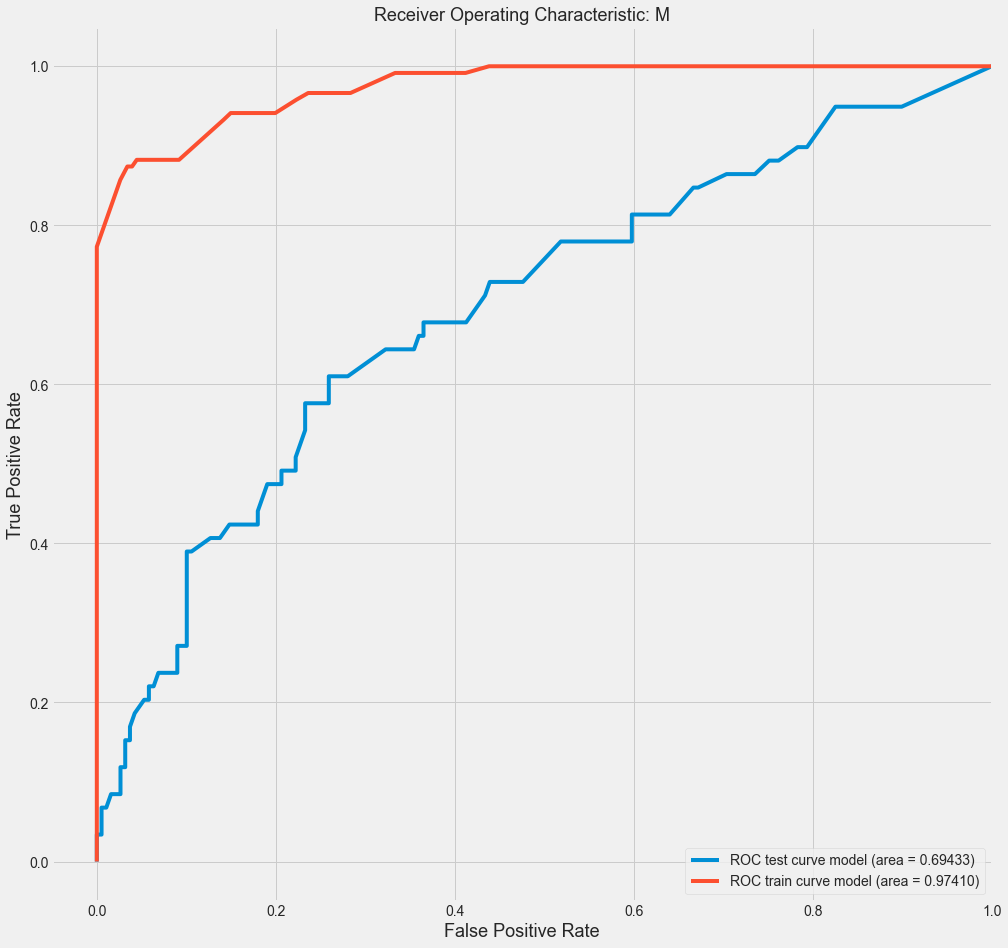

In [25]:
# Evaluate model against training set
evaluate(rfc_clf, X_train, X_test, y_train, y_test)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy score:            0.7782
Precision score:           0.5476
TRAINING RESULTS: 
TRAINING SCORE: 0.946
CONFUSION MATRIX:
[[377   4]
 [ 23  96]]
ACCURACY SCORE:
0.946
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.942500    0.960000     0.946    0.951250      0.946665
recall       0.989501    0.806723     0.946    0.898112      0.946000
f1-score     0.965429    0.876712     0.946    0.921071      0.944314
support    381.000000  119.000000     0.946  500.000000    500.000000
TESTING RESULTS: 
TEST SCORE: 0.7782258064516129
CONFUSION MATRIX: 
[[170  19]
 [ 36  23]]
ACCURACY SCORE:
0.7782
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.825243   0.547619  0.778226    0.686431      0.759195
recall       0.899471   0.389831  0.778226    0.644651      0.778226
f1-score     0.860759   0.455446  0.778226    0.658103      0.764334
support    189.000000  59.000000  0.778226

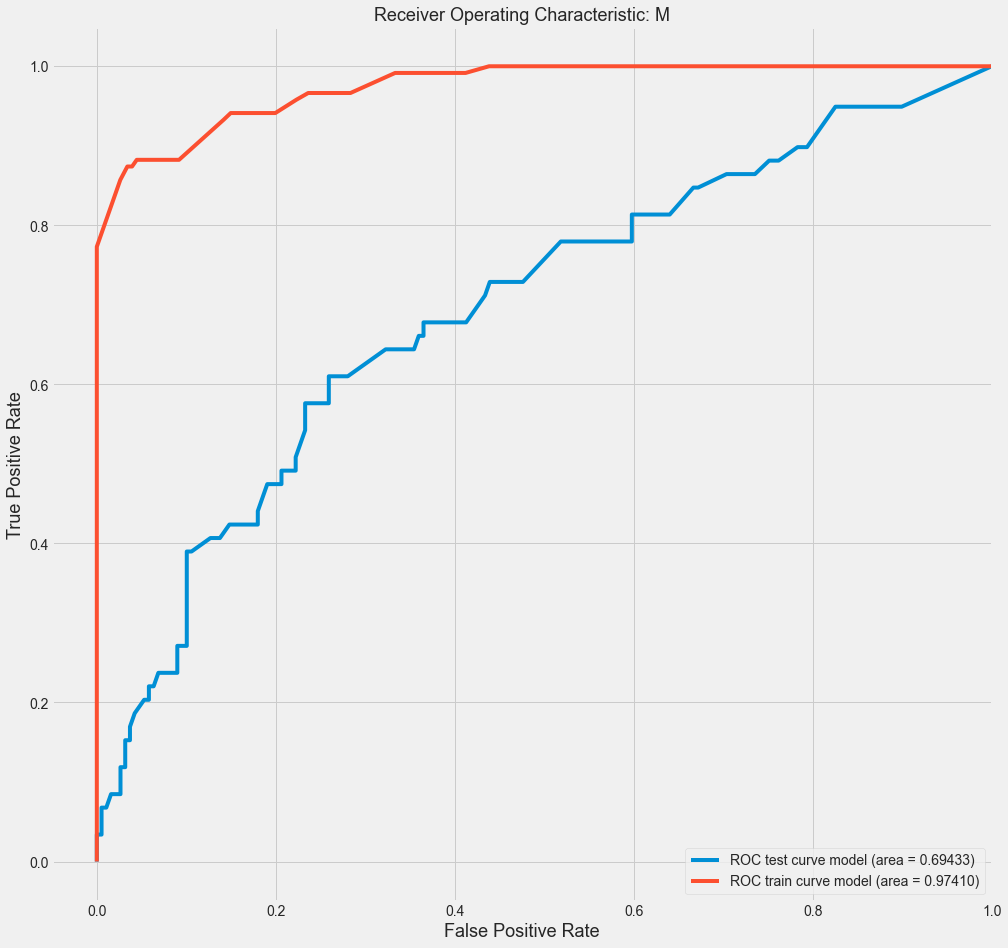

In [26]:
# Evaluate model against test set

evaluate(rfc_clf, X_train, X_test, y_train, y_test)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



